In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('default')

import warnings
warnings.filterwarnings('ignore')

In [2]:
#import csv file
df = pd.read_csv('Amazon Sale Report.csv')

In [3]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [4]:
df.tail()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
128971,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,517.0,HYDERABAD,TELANGANA,500013.0,IN,False,NaN,NaN,NaN
128972,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,INR,999.0,GURUGRAM,HARYANA,122004.0,IN,False,NaN,NaN,NaN
128973,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,...,INR,690.0,HYDERABAD,TELANGANA,500049.0,IN,False,NaN,NaN,NaN
128974,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,...,INR,1199.0,Halol,Gujarat,389350.0,IN,False,NaN,NaN,NaN
128975,128974,408-7436540-8728312,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,S,Shipped,...,INR,696.0,Raipur,CHHATTISGARH,492014.0,IN,False,NaN,NaN,NaN


In [5]:
#print total rows and columns 
print('data has tatal {} rows and {} columns.'.format(df.shape[0],df.shape[1]))

data has tatal 128976 rows and 21 columns.


In [6]:
#print concise summary of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

# Data Preprocessing

In [7]:
#Lets delete index column from dataset because it does not play any role in analysis
df.drop(columns='index',inplace=True)

In [8]:
#print null values from the dataset
df.isnull().sum().sort_values(ascending=False)

PendingS              128976
New                   128976
fulfilled-by           89713
Amount                  7800
currency                7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
Date                       0
Sales Channel              0
B2B                        0
Fulfilment                 0
Status                     0
Order ID                   0
dtype: int64

###### 
as we can see dataset is having missing values in these columns PendingS , New ,fulfilled-by , Amount ,currency , ship-city , ship-state ,ship-postal-code ,ship-country. out of all the columns PendingS and New Column is entirely null so its better we can directly remove PendingS and New Column

In [9]:
df.drop(columns=['PendingS','New'],inplace=True)

In [10]:
#Get the Percentage of null values present in each 
null_values_ds=pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/(df.shape[0])*100)

top_null_ds=null_values_ds.nlargest(7,columns=0)
print(top_null_ds)

                          0
fulfilled-by      69.557902
Amount             6.047637
currency           6.047637
ship-country       0.027137
ship-postal-code   0.027137
ship-state         0.027137
ship-city          0.027137


In [11]:
#lets delete fullfilled by columns as well because it is having 69% null values so if we impute then it will add bias in column and will affect the analysis result.
df.drop('fulfilled-by',axis=1,inplace=True)

In [12]:
df[['Amount','currency','ship-country','ship-postal-code','ship-state',]].dtypes

Amount              float64
currency             object
ship-country         object
ship-postal-code    float64
ship-state           object
dtype: object

In [13]:
df[['Amount','currency','ship-country','ship-postal-code','ship-state',]][:5]

,Amount,currency,ship-country,ship-postal-code,ship-state
0,647.62,INR,IN,400081.0,MAHARASHTRA
1,406.00,INR,IN,560085.0,KARNATAKA
2,329.00,INR,IN,410210.0,MAHARASHTRA
3,753.33,INR,IN,605008.0,PUDUCHERRY
4,574.00,INR,IN,600073.0,TAMIL NADU


In [14]:
#check the datatye of the column before imputting the missing values.
df.dtypes

Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Category               object
Size                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
B2B                      bool
dtype: object

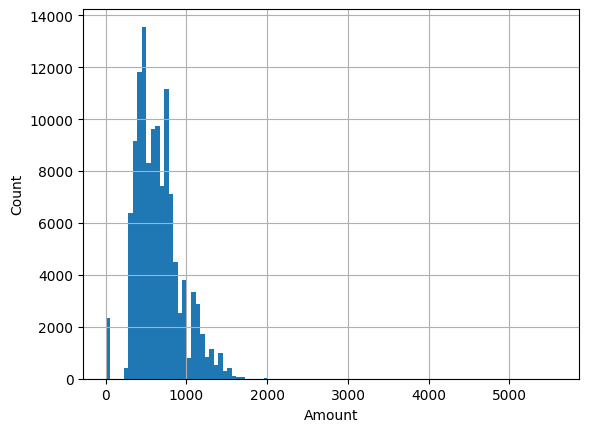

Amount column having skewness : 0.8859651066771677


In [15]:
plt.hist(x=df['Amount'],bins=100)
plt.grid()
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()
print('Amount column having skewness : {}'.format(df['Amount'].skew()))

In [16]:
#amount column is having skewness and it is not noramlly distribution so we can't use mean as imputation measure so lets go with median in this case.
df['Amount']=df['Amount'].fillna(df['Amount'].median()) # hightly skewed thatswhy median used
df['currency']=df['currency'].fillna(df['currency'].mode()[0])# categorical feature thatswhy mode
df['ship-country']=df['ship-country'].fillna(df['ship-country'].mode()[0]) # categorical feature thatswhy mode
df['ship-postal-code']=df['ship-postal-code'].fillna(df['ship-postal-code'].median()) #right skewed thatswhy median
df['ship-state']=df['ship-state'].fillna(df['ship-state'].mode()[0])# categorical feature thatswhy mode
df['ship-city']=df['ship-city'].fillna(df['ship-city'].mode()[0])# categorical feature thatswhy mode

In [17]:
#check and remove duplicate records
print('there are total {} duplicate records present in dataset.'.format(df[df.duplicated()].shape[0]))
df.drop_duplicates(keep='first',inplace=True)

there are total 959 duplicate records present in dataset.


In [18]:
df.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False


In [19]:
#columns format correction
df.dtypes

Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Category               object
Size                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
B2B                      bool
dtype: object

In [20]:
#columns date and postal code is incorrect here we need to convert their data type into right one
df['Date']=pd.to_datetime(df['Date'])
df['ship-postal-code']=df['ship-postal-code'].astype(np.int64)

In [21]:
#print descriptive summary of the dataset : 
df.describe()

,Date,Qty,Amount,ship-postal-code
count,128017,128017.000000,128017.000000,128017.000000
mean,2022-05-12 12:28:25.161033728,0.905763,646.440855,463805.631697
min,2022-03-31 00:00:00,0.000000,0.000000,110001.000000
25%,2022-04-20 00:00:00,1.000000,459.000000,382418.000000
50%,2022-05-10 00:00:00,1.000000,605.000000,500032.000000
75%,2022-06-04 00:00:00,1.000000,771.000000,600024.000000
max,2022-06-29 00:00:00,15.000000,5584.000000,989898.000000
std,NaN,0.311719,273.173905,191534.591520


In [22]:
#rename column name Qty to Quantity
df.rename(columns={'Qty':"Quantity"},inplace=True)

In [23]:
df.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Quantity',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B'],
      dtype='object')

# Exploratory Data Analysis :

#### 1.Status Column:

In [24]:
#value_counts of status
df['Status'].value_counts()

Status
Shipped                          77407
Shipped - Delivered to Buyer     28515
Cancelled                        18044
Shipped - Returned to Seller      1945
Shipped - Picked Up                970
Pending                            656
Pending - Waiting for Pick Up      277
Shipped - Returning to Seller      144
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipping                             8
Shipped - Lost in Transit            4
Shipped - Damaged                    1
Name: count, dtype: int64

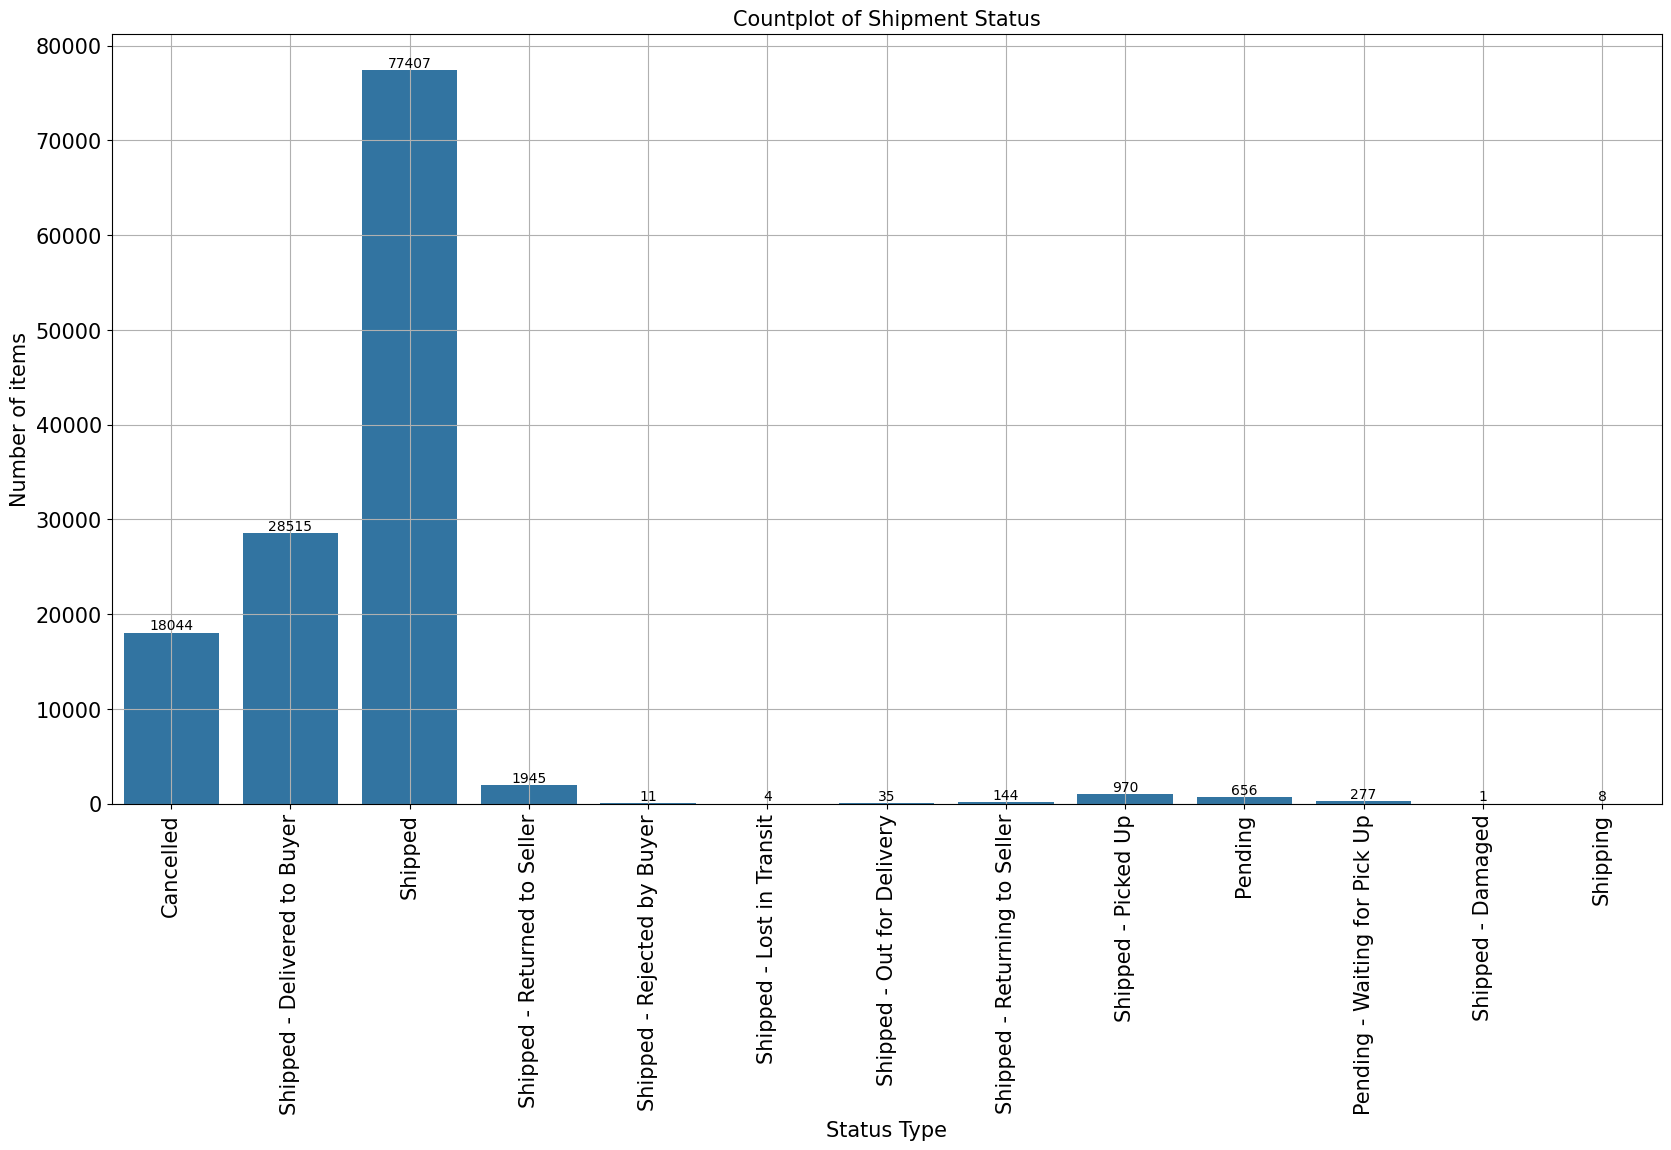

In [25]:
plt.figure(figsize=(20,10))
ax=sns.countplot(x='Status',data=df,)
for val in ax.containers:
    ax.bar_label(val)
plt.xticks(rotation=90,size=15)
plt.yticks(size=15)
plt.xlabel('Status Type',size=15)
plt.ylabel('Number of items',size=15)
plt.grid()
plt.title('Countplot of Shipment Status',size=15)
plt.show()

#### 2.Fulfilment

In [26]:
df['Fulfilment'].value_counts()

Fulfilment
Amazon      89085
Merchant    38932
Name: count, dtype: int64

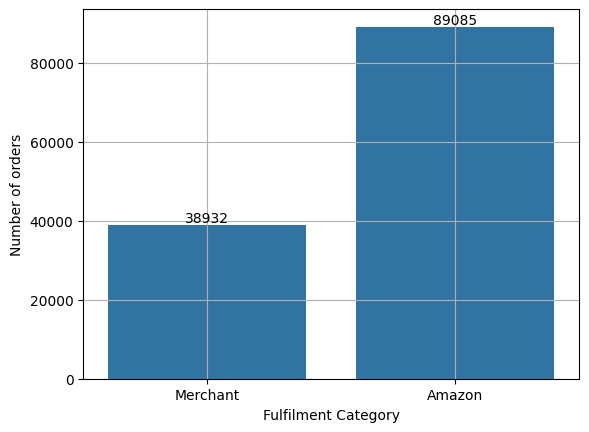

In [27]:
ax=sns.countplot(x='Fulfilment',data=df,)
for bar in ax.containers:
    ax.bar_label(bar)
plt.grid()
plt.xlabel('Fulfilment Category')
plt.ylabel('Number of orders')
plt.show()

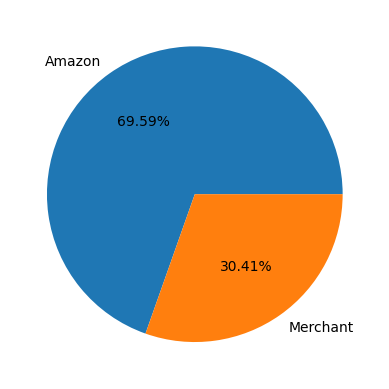

As we can see most of the orders are fullfilled by AMAZON and remaining order fullfilled by Merchant


In [28]:
plt.pie(x=df['Fulfilment'].value_counts().values,labels=df['Fulfilment'].value_counts().index,autopct='%0.2f%%')
plt.show()
print('As we can see most of the orders are fullfilled by AMAZON and remaining order fullfilled by Merchant')

#### 3.Sales Channel

In [29]:
df['Sales Channel'].value_counts()

Sales Channel
Amazon.in     127893
Non-Amazon       124
Name: count, dtype: int64

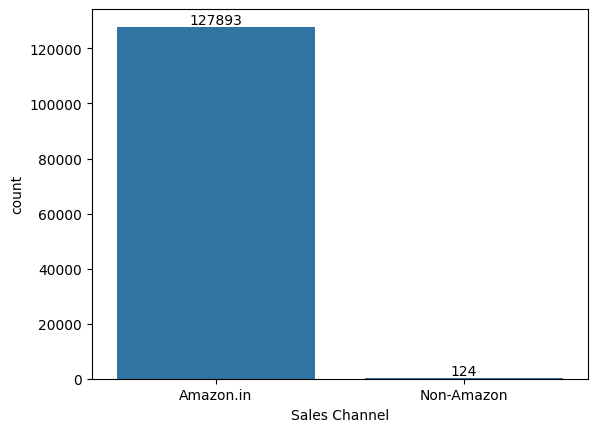

In [30]:
ax=sns.countplot(x='Sales Channel',data=df)
for bar_value in ax.containers:
    ax.bar_label(bar_value)
plt.show()

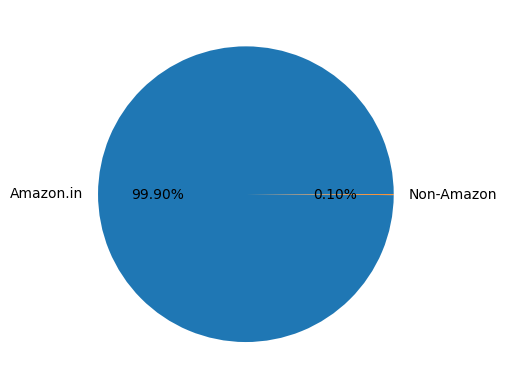

In [31]:
plt.pie(x=df['Sales Channel'].value_counts().values,labels=df['Sales Channel'].value_counts().index,autopct='%0.2f%%')
plt.show()

##### amazon.in channel contributing 99.90 % in sales and 0.10 % of sales is coming from non-amazon channel

#### 4.ship-service-level

In [32]:
df['ship-service-level'].value_counts()

ship-service-level
Expedited    88003
Standard     40014
Name: count, dtype: int64

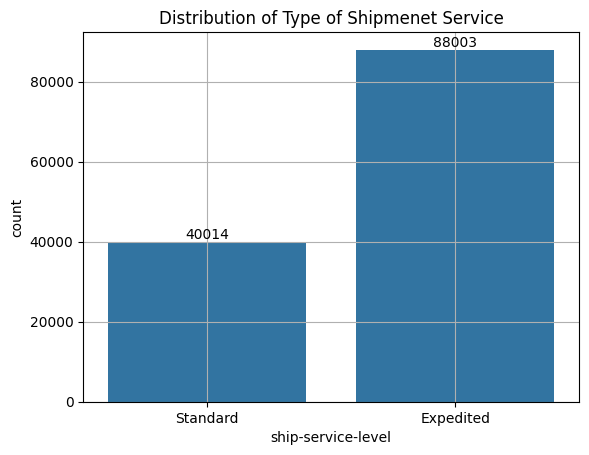

In [33]:
ax=sns.countplot(x='ship-service-level',data=df)
for bar_value in ax.containers:
    ax.bar_label(bar_value)
plt.title('Distribution of Type of Shipmenet Service')
plt.grid()
plt.show()

plt.pie(x=df['ship-service-level'].value_counts().values,labels=df['ship-service-level'].value_counts().index,autopct='%0.2f%%')
plt.title('Pie Chart of Shipmenet Service Type')
plt.show()

##### 68.74 % of order has been processed using Expedited Shipment Service Type and only 31.26 % of orders are processed with Standard Shipment Service Level.

#### 5.Category

In [34]:
#value count of category
df['Category'].value_counts()

Category
T-shirt     50042
Shirt       49352
Blazzer     15391
Trousers    10577
Perfume      1154
Wallet        913
Socks         429
Shoes         157
Watch           2
Name: count, dtype: int64

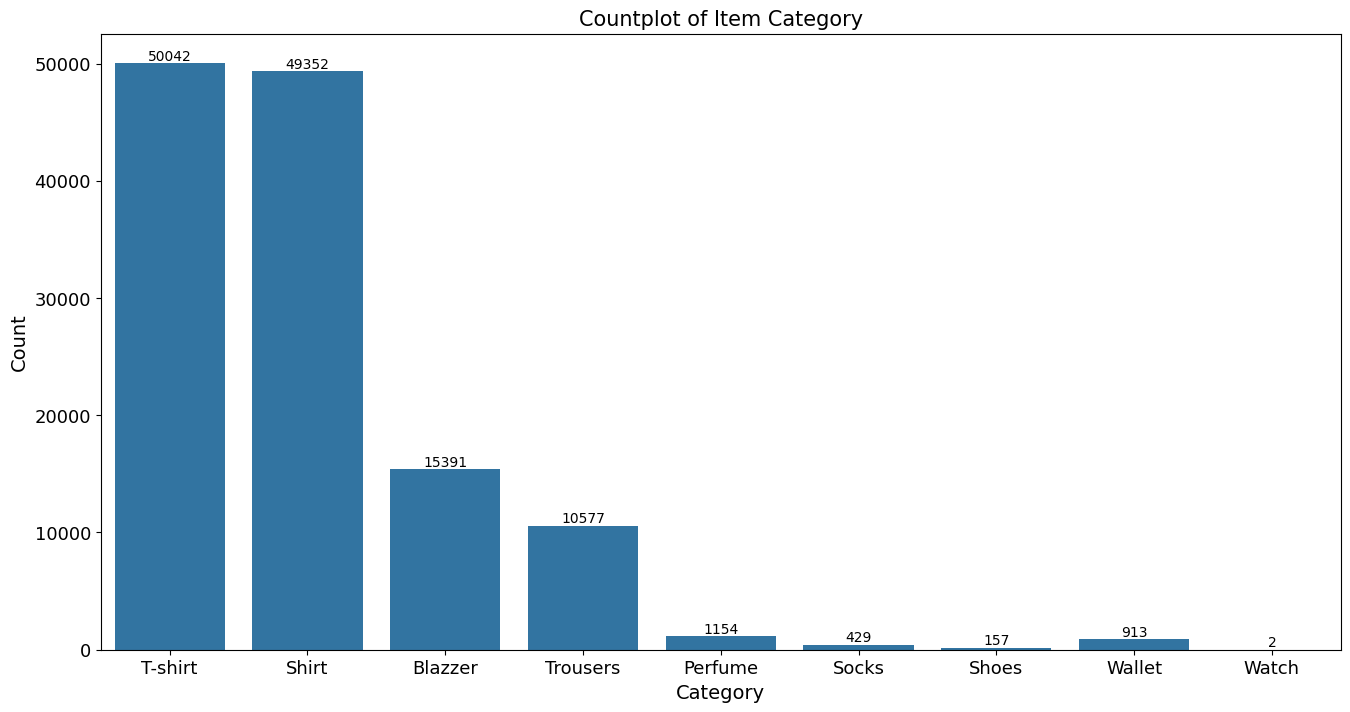

In [35]:
plt.figure(figsize=(16,8))
ax=sns.countplot(x='Category',data=df)
for bar_value in ax.containers:
    ax.bar_label(bar_value)
plt.xticks(size=13)
plt.yticks(size=13)
plt.xlabel('Category',size=14)
plt.ylabel('Count',size=14)
plt.title('Countplot of Item Category',size=15)
plt.show()

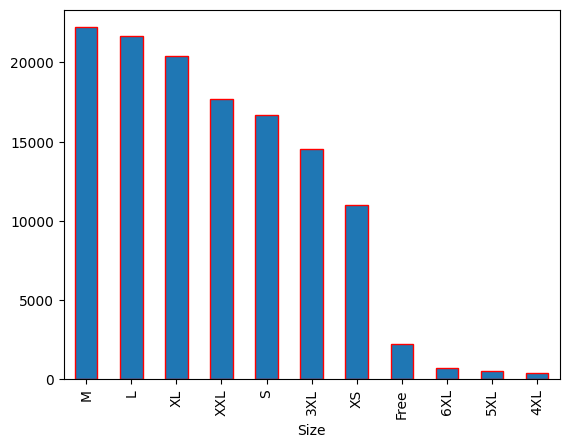

In [36]:
df['Size'].value_counts().plot(kind='bar',edgecolor='r')
plt.show()

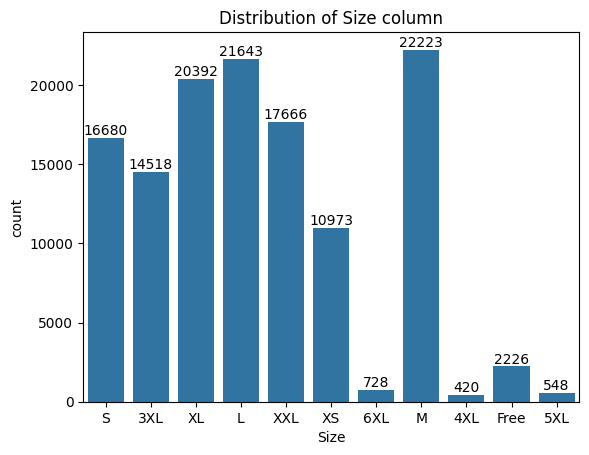

In [37]:
ax=sns.countplot(x='Size',data=df)
for bar_value in ax.containers:
    ax.bar_label(bar_value)
plt.title('Distribution of Size column')
plt.show()

##### In above graph most of the people buyin M , L and XL size cloths.

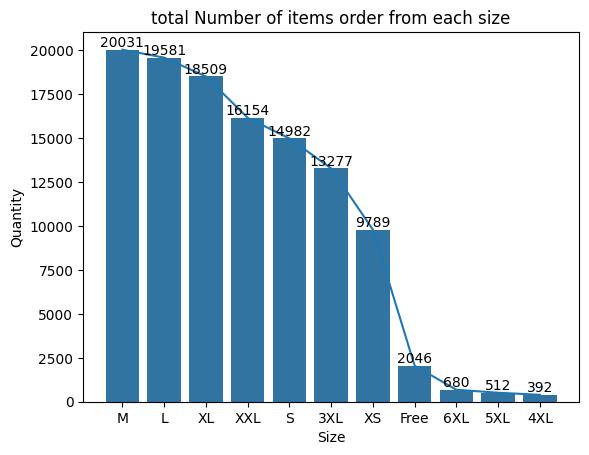

In [38]:
size_ds=pd.DataFrame(df.groupby('Size')['Quantity'].sum().sort_values(ascending=False))

ax=sns.barplot(x=size_ds.index,y='Quantity',data=size_ds)
for bar_value in ax.containers:
    ax.bar_label(bar_value)
plt.plot(size_ds['Quantity'])
plt.title('total Number of items order from each size')
plt.show()

##### 7.Courier Status

In [39]:
df['Courier Status'].value_counts()

Courier Status
Shipped       108830
On the Way      6799
Unshipped       6644
Cancelled       5744
Name: count, dtype: int64

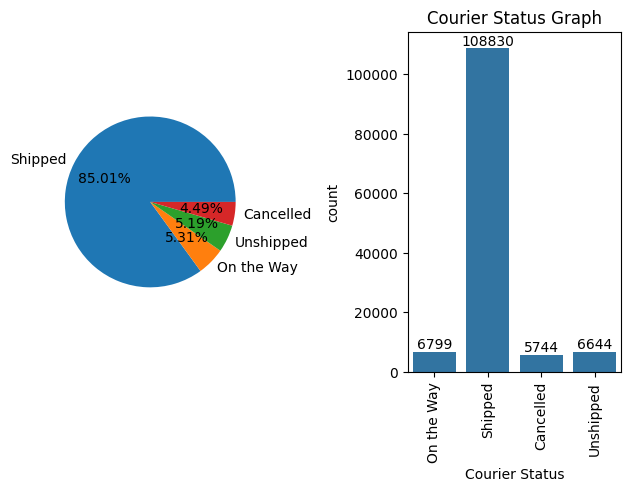

In [40]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2)

ax1.pie(x=df['Courier Status'].value_counts().values,labels=df['Courier Status'].value_counts().index,autopct='%0.2f%%')
ax=sns.countplot(x='Courier Status',data=df,ax=ax2)
for bar_value in ax.containers:
    ax.bar_label(bar_value)
plt.xticks(rotation=90)
plt.tight_layout()
plt.title('Courier Status Graph')
plt.show()

#### 8.Quantity

In [41]:
df['Quantity'].value_counts()

Quantity
1     115088
0      12543
2        339
3         32
4          9
5          2
15         1
9          1
13         1
8          1
Name: count, dtype: int64

#### 9.Currency

In [42]:
df['currency'].value_counts()/df.shape[0]*100

currency
INR    100.0
Name: count, dtype: float64

##### 100 % transaction done in INR currency only

In [43]:
df.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Quantity',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B'],
      dtype='object')

#### 10.ship-country

In [44]:
df['ship-country'].unique()

array(['IN'], dtype=object)

##### ALL orders receive shipped within india only

#### 11.ship-state

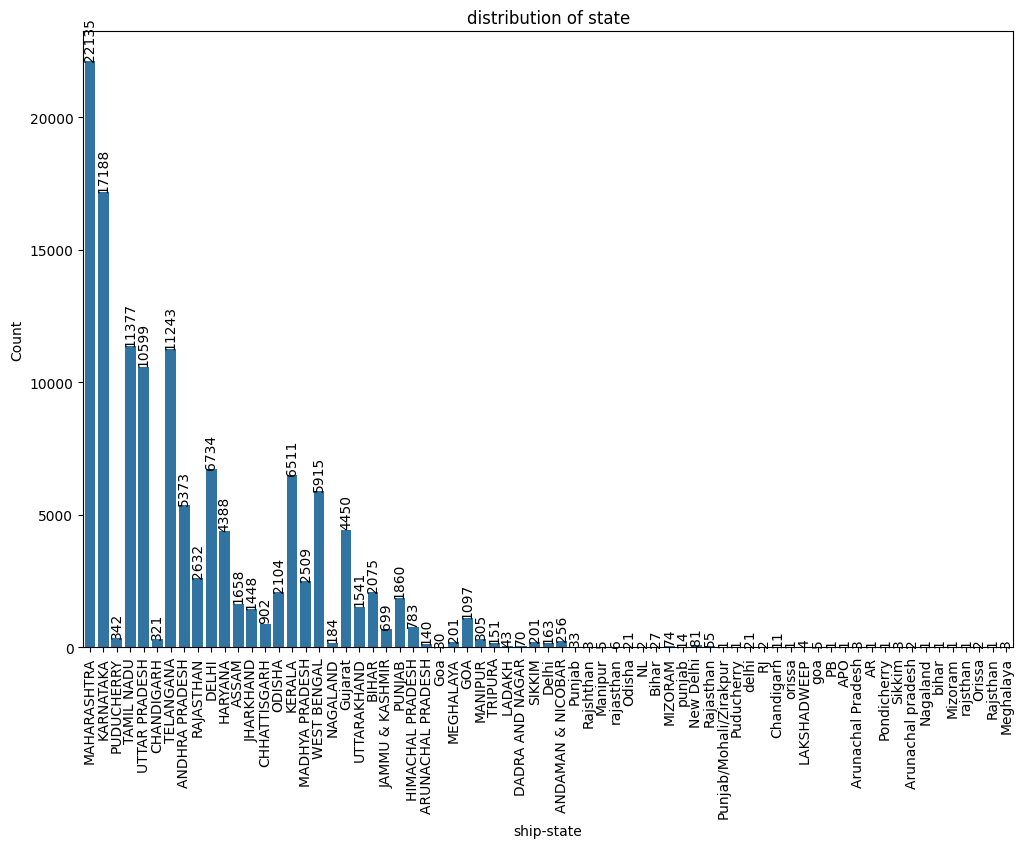

In [45]:
plt.figure(figsize=(12,8))
ax = sns.countplot(data=df, x='ship-state')
for bars in ax.containers:
    ax.bar_label(bars, fmt='%d', rotation=90)
plt.xlabel('ship-state')
plt.ylabel('Count')
plt.title('distribution of state')
plt.xticks(rotation=90)
plt.show()

##### top 5 most of the buyers from [ MAHARASHTRA, KARNATAKA, TAMIL-NADU, TELANGANA, UTTAR-PRADESH]

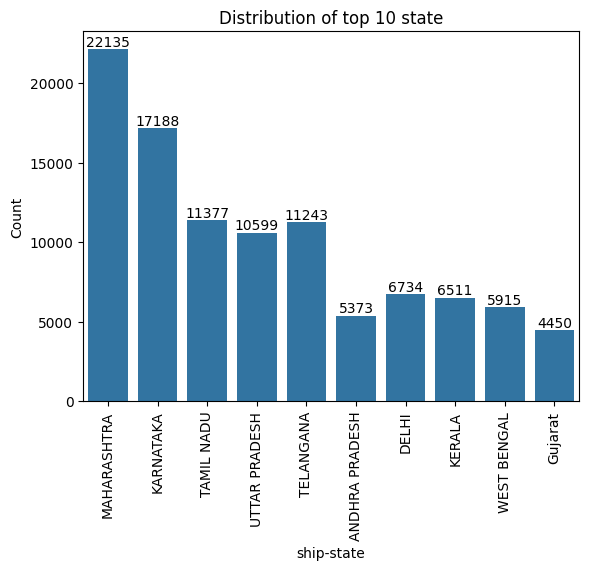

In [46]:
#Top 10 State Graph
top_10_state_index=df['ship-state'].value_counts().sort_values(ascending=False).head(10).index
ax=sns.countplot(data=df[df['ship-state'].isin(top_10_state_index)], x = 'ship-state')
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel('ship-state')
plt.ylabel('Count')
plt.title('Distribution of top 10 state')
plt.xticks(rotation  = 90)
plt.show()

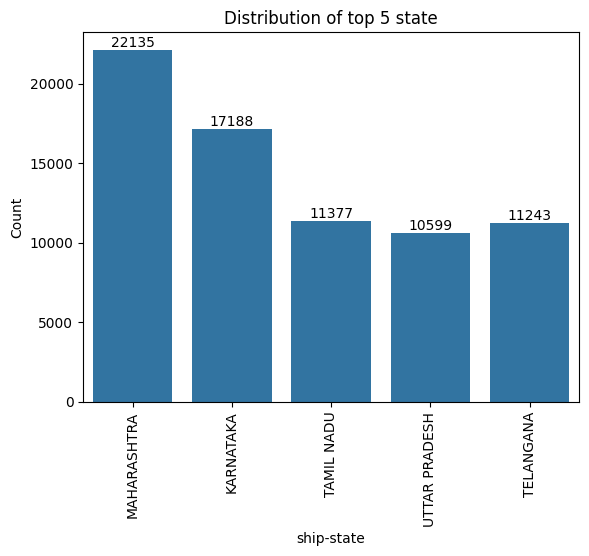

In [47]:
#Top 5 State Graph
#Top 10 State Graph
top_5_state_index=df['ship-state'].value_counts().sort_values(ascending=False).head(5).index
ax=sns.countplot(data=df[df['ship-state'].isin(top_5_state_index)], x = 'ship-state')
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel('ship-state')
plt.ylabel('Count')
plt.title('Distribution of top 5 state')
plt.xticks(rotation  = 90)
plt.show()

#### 12.ship-city

In [48]:
#value counts of city
df['ship-city'].value_counts().sort_values(ascending=False).head(5)

ship-city
BENGALURU    11153
HYDERABAD     8018
MUMBAI        6069
NEW DELHI     5752
CHENNAI       5376
Name: count, dtype: int64

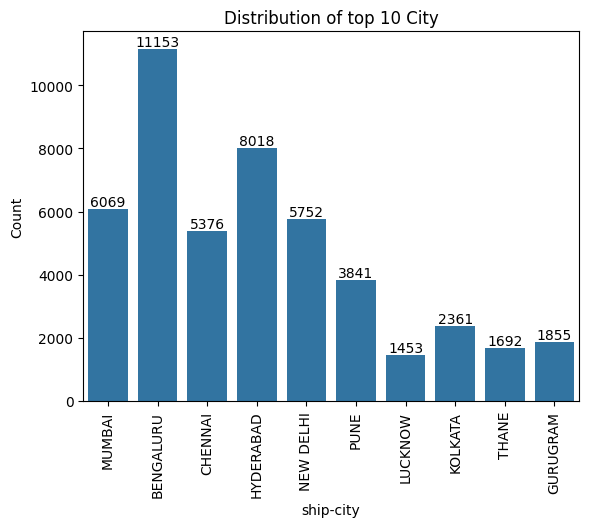

In [49]:
#plot top 10 city from the dataset
top_10_city=df['ship-city'].value_counts().sort_values(ascending=False).head(10).index
ax=sns.countplot(x='ship-city',data=df[df['ship-city'].isin(top_10_city)])
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel('ship-city')
plt.ylabel('Count')
plt.title('Distribution of top 10 City')
plt.xticks(rotation  = 90)
plt.show()

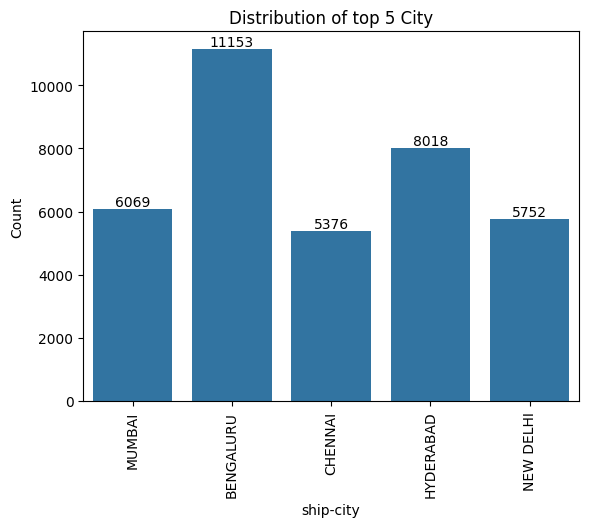

In [50]:
#plot top 5 cities from the dataset
top_5_city=df['ship-city'].value_counts().sort_values(ascending=False).head(5).index
ax=sns.countplot(x='ship-city',data=df[df['ship-city'].isin(top_5_city)])
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel('ship-city')
plt.ylabel('Count')
plt.title('Distribution of top 5 City')
plt.xticks(rotation  = 90)
plt.show()

#### 13.ship-postal-code

In [51]:
#top 10 postal code from where orders are coming mostly
df['ship-postal-code'].value_counts().sort_values(ascending=False).head(10)

ship-postal-code
201301    1000
122001     680
560037     628
560068     606
560076     574
560043     497
500072     487
401107     487
560100     486
560066     461
Name: count, dtype: int64

#### 14.B2B

##### True : Business To Business Sales

##### False : Business To Consumer / Retail Sales

In [52]:
df['B2B'].value_counts()

B2B
False    127150
True        867
Name: count, dtype: int64

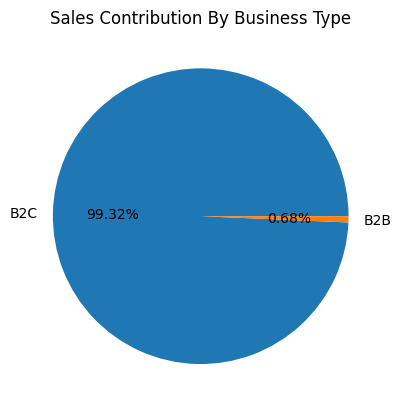

In [53]:
plt.pie(x=df['B2B'].value_counts().values,labels=['B2C','B2B'],autopct='%0.2f%%')
plt.title('Sales Contribution By Business Type')
plt.show()

#### Conclusion

##### 
Here is the conclusion of all over analysis of amazon sales dataset

#####    
1. Shipment-status: in the shipment graph we see all types of orders that are pending, returned, canceled, shipped, etc.
2. Fulfilment     : in the fulfillment, 69% of orders were fulfilled by AMAZON, and the remaining 29% of the orders were fulfilled by     merchants. For this analysis, we used countplot and pie-chart.
3. Sales Channel  : amazon.in channel contributing 99.90 % in sales and 0.10 % of sales is coming from non-amazon channel.
4. Ship-service-level : 68.74 % of order has been processed using Expedited Shipment Service Type and only 31.26 % of orders are processed  with Standard Shipment Service Level.
5. Category       : T-shirt, Shirt, Blazzer, Trousers,Perfume these are top performing categorie and lowerest performing categories are watch and shoes.
6. Size           : most of the people prefer M, L, XL , S and 4XL, 5XL and 6XL are lower performing Size
7. Courier Status : almost all orders are shipped, some orders are on the way and some orders are unshipped.
8. Quantity       : most of the people love to buy single item at once.
9. Currency       : 100 % Transaction has been made using Indian Currency only
10. Ship-country  : All Orders are shipped within india only
11. Ship-state    : People are buying highly from MAHARASHTRA, KARNATAKA, TAMIL-NADU, TELENGANA, AND UTTAR-PRADESH State.
12. Ship-city     : These are top performing cities - BENGALURU, HYDERABAD, MUMBAI, NEW DELHI, CHENNAI  
13. B2B           : 99.32 Sales is coming from B2C/Retail Type Business and remaining 0.68 % Sales coming from B2B